Today, I will using my data science skill to analyze and also draw insight from my findings

In [128]:
# import necessary library

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats

In [129]:
# view the data

observations = pd.read_csv('./observations.csv')
species = pd.read_csv('./species_info.csv')

observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [130]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [131]:
# inspect the first data

observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [132]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [133]:
conservations = species['conservation_status'].unique()
conservations

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [134]:
# change the NULL value
species['conservation_status'] = species['conservation_status'].fillna(value = 'No Intervention')
species.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention
1,Mammal,Bos bison,"American Bison, Bison",No Intervention
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


In [135]:
species.groupby('conservation_status').size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

In [136]:
status = species[species['conservation_status'] != 'No Intervention']
status = status.groupby(['conservation_status', 'category']).scientific_name.count().reset_index().pivot(columns='category', index = 'conservation_status', values = 'scientific_name')
status

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


<Axes: xlabel='conservation_status'>

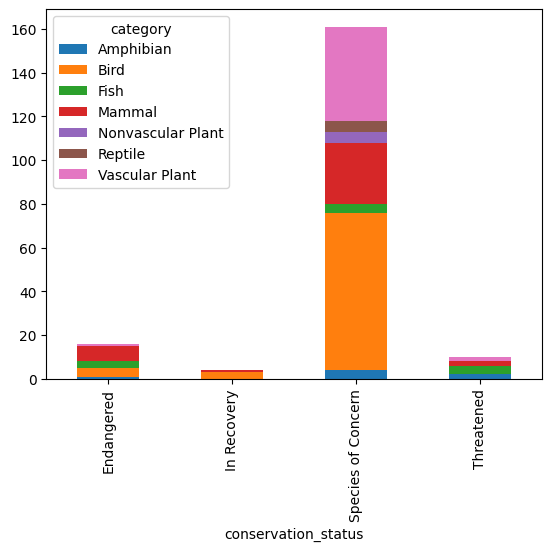

In [137]:
status.plot(kind = 'bar', stacked=True)

In [138]:
species['is_protected'] = species['conservation_status'] != 'No Intervention'
species

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False
...,...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,No Intervention,False
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",No Intervention,False
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",No Intervention,False
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",No Intervention,False


In [139]:
protected = species.groupby(['category','is_protected']).conservation_status.count().reset_index().pivot(columns='is_protected', index = 'category', values = 'conservation_status').reset_index()
protected.columns = ['category', 'not_protected', 'is_protected']
protected['protetive_percentage'] = round(protected['is_protected']/(protected['not_protected'] + protected['is_protected']) * 100,2)
protected

,category,not_protected,is_protected,protetive_percentage
0,Amphibian,73,7,8.75
1,Bird,442,79,15.16
2,Fish,116,11,8.66
3,Mammal,176,38,17.76
4,Nonvascular Plant,328,5,1.50
5,Reptile,74,5,6.33
6,Vascular Plant,4424,46,1.03


In [140]:
observed = np.array([[  73,  7],
                     [ 442, 79],
                     [ 116, 11],
                     [ 176, 38],
                     [ 328,  5],
                     [  74,  5],
                     [4424, 46]])
chi2_stat, p_value, dof, expected_data = stats.chi2_contingency(observed)
p_value

np.float64(3.095911909904608e-98)

Since `p_value` < 0.05 so we reject the null hypothesis

In [141]:
import string
def filter(x):
    for punctuation in string.punctuation:
        x = x.replace(punctuation, '')
    return x.split(' ')[-1]
common_names = species['common_names']
common_names = common_names.apply(filter)
common_names.value_counts()

common_names
Moss       280
Sedge      222
Grass       73
Rush        59
Warbler     58
          ... 
Bobcat       1
Wildcat      1
Coyote       1
Pig          1
Feral        1
Name: count, Length: 1704, dtype: int64

In [142]:
species['is_moss'] = species['common_names'].str.contains(r'\bMoss\b', regex = True)
species[species['is_moss']]

,category,scientific_name,common_names,conservation_status,is_protected,is_moss
1289,Vascular Plant,Phlox subulata,Moss Phlox,No Intervention,False,True
1749,Vascular Plant,Huperzia lucidula,"Shining Clubmoss, Shining Club-Moss",No Intervention,False,True
2609,Vascular Plant,Sedum acre,"Gold-Moss, Mossy Stonecrop",No Intervention,False,True
2643,Vascular Plant,Selaginella apoda,Meadow Spike-Moss,No Intervention,False,True
2679,Nonvascular Plant,Andreaea rothii,Roth's Andreaea Moss,No Intervention,False,True
...,...,...,...,...,...,...
3708,Vascular Plant,Silene acaulis var. subacaulescens,"Moss Campion, Moss Catchfly",No Intervention,False,True
3988,Vascular Plant,Lycopodium annotinum,"Clubmoss, Stiff Club Moss, Stiff Clubmoss",No Intervention,False,True
4445,Nonvascular Plant,Fontinalis,Fontinalis Moss,No Intervention,False,True
5076,Vascular Plant,Cassiope mertensiana,"Western Moss Heather, White Heather",No Intervention,False,True


In [143]:
merged = observations.merge(species[species['is_moss']], how = 'inner')
merged = merged.groupby(['park_name','is_protected']).observations.sum().reset_index()
merged

,park_name,is_protected,observations
0,Bryce National Park,False,28690
1,Bryce National Park,True,270
2,Great Smoky Mountains National Park,False,21464
3,Great Smoky Mountains National Park,True,174
4,Yellowstone National Park,False,72104
5,Yellowstone National Park,True,679
6,Yosemite National Park,False,43248
7,Yosemite National Park,True,414


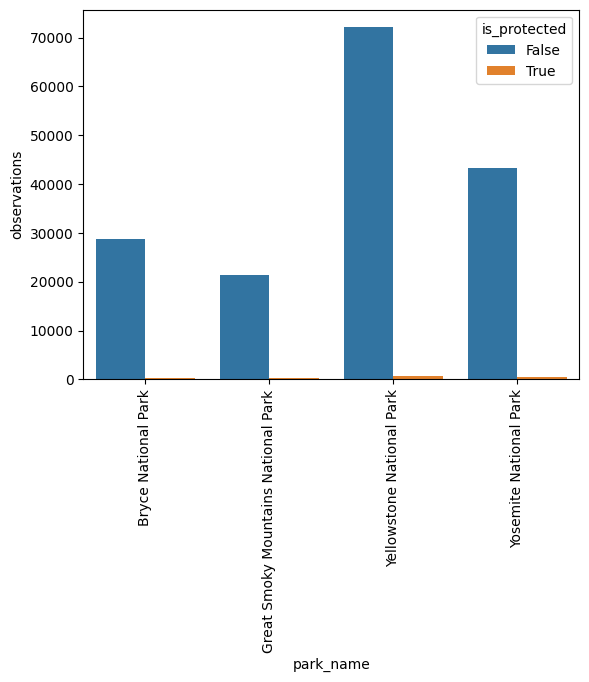

In [153]:
sns.barplot(data = merged, x = 'park_name', y = 'observations', hue = 'is_protected')
plt.xticks(rotation = 90)
plt.show()

#### Conclusions

The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.

This project was also able to answer some of the questions first posed in the beginning:

- What is the distribution of conservation status for species?
    - The vast majority of species were not part of conservation.(5,633 vs 191)
- Are certain types of species more likely to be endangered?
    - Mammals and Birds had the highest percentage of being in protection.
- Are the differences between species and their conservation status significant?
    - We have base to say that there is no relationship between species and their conservation status.
- Which species is most prevalent and what is their distribution amongst parks?
    - the study found that moss occurred the most number of times and they were most likely to be found in Yellowstone National Park.
